In [25]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import abline_plot


In [26]:
perfusion_volumes_df = pd.read_excel('/Users/julian/stroke_research/perfusion_volumes/perfusion_volumes.xlsx', 
                                     sheet_name='volumes_ml')
RAPID_volumes_df = pd.read_excel('/Users/julian/stroke_research/perfusion_volumes/RAPID_volumes.xlsx')

perfusion_volumes_df = perfusion_volumes_df.merge(RAPID_volumes_df, left_on='subject_id', right_on='anonymised_id')
perfusion_volumes_df = perfusion_volumes_df.drop(columns=['Nom', 'Prénom', 'patient_identifier'])


In [27]:
def linear_fit(x_name, y_name, dataframe):
    X = dataframe[x_name]
    y = dataframe[y_name]
    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
    predictions = model.predict(X)

    print(model.summary())

    # scatter-plot data
    ax = dataframe.plot(x=x_name, y=y_name, kind='scatter')

    # plot regression line
    abline_plot(model_results=model, ax=ax)



                            OLS Regression Results                            
Dep. Variable:           ground_truth   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     107.1
Date:                Sat, 04 Apr 2020   Prob (F-statistic):           5.08e-19
Time:                        23:45:15   Log-Likelihood:                -688.04
No. Observations:                 143   AIC:                             1380.
Df Residuals:                     141   BIC:                             1386.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    14.84

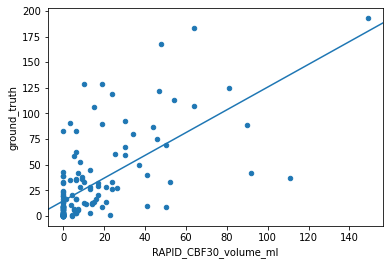

In [28]:
linear_fit('RAPID_CBF30_volume_ml', 'ground_truth', perfusion_volumes_df)

                            OLS Regression Results                            
Dep. Variable:           ground_truth   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     57.52
Date:                Sat, 04 Apr 2020   Prob (F-statistic):           4.10e-12
Time:                        23:47:30   Log-Likelihood:                -703.98
No. Observations:                 143   AIC:                             1412.
Df Residuals:                     141   BIC:                             1418.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

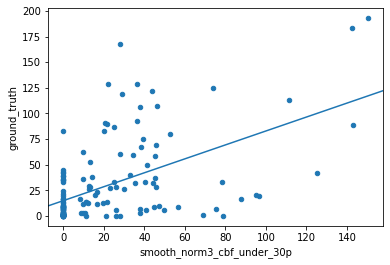

In [33]:
linear_fit('smooth_norm3_cbf_under_30p', 'ground_truth', perfusion_volumes_df)